# Image IPP coding

In [1]:
sequence = "bus"

## Without I-type blocks

In [2]:
!sed -z -i 's/\n#import image_IPP as IPP\n/\nimport image_IPP as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP as IPP\n/g' RD_curve.py

In [3]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
import image_IPP as IPP
#import image_IPP_adaptive as IPP as IPP


In [4]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

libpng error: IDAT: CRC error
Traceback (most recent call last):
  File "/home/vruiz/MRVC/src/RD_curve.py", line 30, in <module>
    _distortion = distortion.AMSE(video, f"{video}reconstructed_",
  File "/home/vruiz/MRVC/src/distortion.py", line 21, in AMSE
    y = frame.read(y_prefix, k)
  File "/home/vruiz/MRVC/src/frame.py", line 22, in read
    print(img.shape, img.dtype, os.path.getsize(fn), colored.style.RESET)
AttributeError: 'NoneType' object has no attribute 'shape'
     1	Q_step: 21 BPP: 0.4415982744107744 KBPS: 4029.072 Average AMSE: 49.7563548900463
     2	Q_step: 22 BPP: 0.4006155303030303 KBPS: 3655.152 Average AMSE: 57.38056487180835
     3	Q_step: 23 BPP: 0.36308396464646464 KBPS: 3312.72 Average AMSE: 66.60168569374301
     4	Q_step: 24 BPP: 0.3277172769360269 KBPS: 2990.04 Average AMSE: 77.0008304617354
     5	Q_step: 25 BPP: 0.2943927118406285 KBPS: 2685.992 Average AMSE: 90.49760101010104
     6	Q_step: 26 BPP: 0.26485514870931537 KBPS: 2416.496 Average AMSE: 106.05

In [5]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_no_intrablocks.txt

In [6]:
!cat /tmp/curve_no_intrablocks.txt

0.4415982744107744	49.7563548900463
0.4006155303030303	57.38056487180835
0.36308396464646464	66.60168569374301
0.3277172769360269	77.0008304617354
0.2943927118406285	90.49760101010104
0.26485514870931537	106.05246869739057
0.23674856200897867	124.58244346678589
0.21149252946127947	146.76258253103956
0.18781477974186309	172.4633477790053
0.1661765221661055	203.39484493371216
0.14720994668911336	238.66845297593997
0.12917543490460157	280.27864605253933
0.11386609147025814	324.48683054503374
0.10094346240179573	372.00364123000844
0.08930713383838383	425.68165180450336
0.07825126262626263	483.44873967539985
0.06963646885521886	537.5542773656705
0.06191077441077441	595.0101701695777
0.10575459455667789	597.8287505041737
0.06205545033670034	716.2003593881524


In [7]:
RD_points_no_intrablocks = []
with open("/tmp/curve_no_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_no_intrablocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [8]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as IPP\n/\nimport image_IPP_adaptive as IPP\n/g' RD_curve.py

In [9]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
import image_IPP_adaptive as IPP


In [10]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.4212612233445567 KBPS: 3843.52 Average AMSE: 40.84510096625981
     2	Q_step: 22 BPP: 0.382215382996633 KBPS: 3487.272 Average AMSE: 47.55179990004209
     3	Q_step: 23 BPP: 0.34606043069584735 KBPS: 3157.4 Average AMSE: 55.20095058659511
     4	Q_step: 24 BPP: 0.3133207070707071 KBPS: 2858.6879999999996 Average AMSE: 63.92290789842875
     5	Q_step: 25 BPP: 0.2815375982042648 KBPS: 2568.7039999999997 Average AMSE: 74.84315014292228
     6	Q_step: 26 BPP: 0.25293735970819303 KBPS: 2307.76 Average AMSE: 87.97491944181397
     7	Q_step: 27 BPP: 0.22736654741863074 KBPS: 2074.456 Average AMSE: 102.39967458876964
     8	Q_step: 28 BPP: 0.20389134399551065 KBPS: 1860.272 Average AMSE: 120.09376841329964
     9	Q_step: 29 BPP: 0.1831632295173962 KBPS: 1671.152 Average AMSE: 140.37393992003368
    10	Q_step: 30 BPP: 0.16324968434343434 KBPS: 1489.464 Average AMSE: 163.74022253787874
    11	Q_step: 31 BPP: 0.1464453563411897 KBPS: 1336.144 Average AMSE: 190.59326884294

In [11]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_with_intrablocks.txt

In [12]:
!cat /tmp/curve_with_intrablocks.txt

0.4212612233445567	40.84510096625981
0.382215382996633	47.55179990004209
0.34606043069584735	55.20095058659511
0.3133207070707071	63.92290789842875
0.2815375982042648	74.84315014292228
0.25293735970819303	87.97491944181397
0.22736654741863074	102.39967458876964
0.20389134399551065	120.09376841329964
0.1831632295173962	140.37393992003368
0.16324968434343434	163.74022253787874
0.1464453563411897	190.59326884294333
0.13124736952861954	222.0218300627806
0.11825810185185184	256.2812246817129
0.10741003787878789	296.4588974598415
0.09746071829405163	337.092570123983
0.0874351150392817	382.0921660178171
0.07916491301907969	428.2882572469486
0.0726466049382716	474.13923424786054
0.06699021464646464	526.9521364907757
0.06245089786756454	577.1087740468924
0.05818515011223345	639.831924825512


In [13]:
RD_points_with_intrablocks = []
with open("/tmp/curve_with_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_with_intrablocks.append((float(rate), float(_distortion)))

## MP4

In [8]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py

In [9]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
import image_IPP_adaptive as IPP


In [10]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.4212612233445567 KBPS: 3843.52 Average AMSE: 40.84510096625981
     2	Q_step: 22 BPP: 0.382215382996633 KBPS: 3487.272 Average AMSE: 47.55179990004209
     3	Q_step: 23 BPP: 0.34606043069584735 KBPS: 3157.4 Average AMSE: 55.20095058659511
     4	Q_step: 24 BPP: 0.3133207070707071 KBPS: 2858.6879999999996 Average AMSE: 63.92290789842875
     5	Q_step: 25 BPP: 0.2815375982042648 KBPS: 2568.7039999999997 Average AMSE: 74.84315014292228
     6	Q_step: 26 BPP: 0.25293735970819303 KBPS: 2307.76 Average AMSE: 87.97491944181397
     7	Q_step: 27 BPP: 0.22736654741863074 KBPS: 2074.456 Average AMSE: 102.39967458876964
     8	Q_step: 28 BPP: 0.20389134399551065 KBPS: 1860.272 Average AMSE: 120.09376841329964
     9	Q_step: 29 BPP: 0.1831632295173962 KBPS: 1671.152 Average AMSE: 140.37393992003368
    10	Q_step: 30 BPP: 0.16324968434343434 KBPS: 1489.464 Average AMSE: 163.74022253787874
    11	Q_step: 31 BPP: 0.1464453563411897 KBPS: 1336.144 Average AMSE: 190.59326884294

In [11]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_with_intrablocks.txt

In [12]:
!cat /tmp/curve_with_intrablocks.txt

0.4212612233445567	40.84510096625981
0.382215382996633	47.55179990004209
0.34606043069584735	55.20095058659511
0.3133207070707071	63.92290789842875
0.2815375982042648	74.84315014292228
0.25293735970819303	87.97491944181397
0.22736654741863074	102.39967458876964
0.20389134399551065	120.09376841329964
0.1831632295173962	140.37393992003368
0.16324968434343434	163.74022253787874
0.1464453563411897	190.59326884294333
0.13124736952861954	222.0218300627806
0.11825810185185184	256.2812246817129
0.10741003787878789	296.4588974598415
0.09746071829405163	337.092570123983
0.0874351150392817	382.0921660178171
0.07916491301907969	428.2882572469486
0.0726466049382716	474.13923424786054
0.06699021464646464	526.9521364907757
0.06245089786756454	577.1087740468924
0.05818515011223345	639.831924825512


In [ ]:
RD_points_MP4 = []
with open("/tmp/mp4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_MP4.append((float(rate), float(_distortion)))

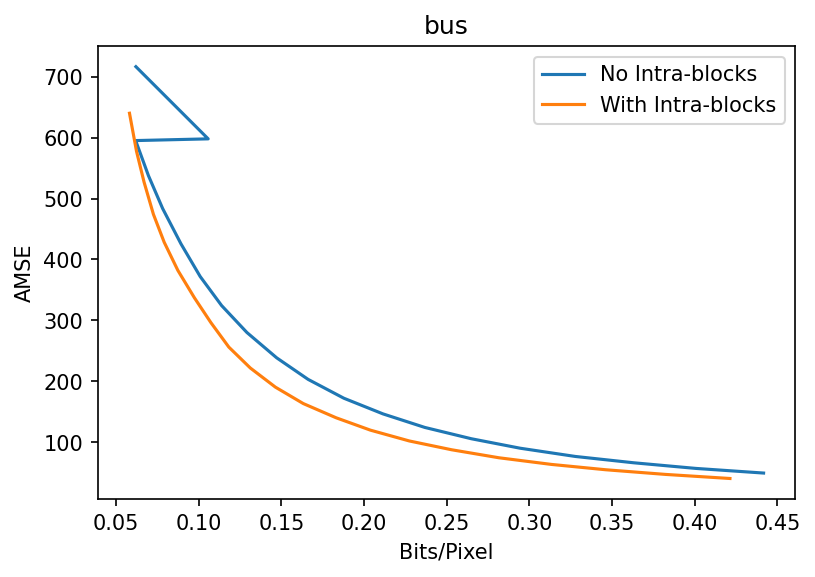

In [14]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()